# Spiral Dataset

Sure, I'd be happy to explain the process.

The dataset creation takes inspiration from polar coordinates, which is a two-dimensional coordinate system where each point on a plane is determined by a distance from a reference point (usually the origin) and an angle from a reference direction.

The spirals are created using the equation of a logarithmic spiral in polar coordinates, `r = a * e^(b * θ)`. In this equation, `r` is the distance of a point from the origin, `θ` is the angle, and `a` and `b` are real numbers which affect the size and tightness of the spiral. We're setting `a = 780` and `b = 1`, but by playing around with these numbers you can get different spiral shapes.

The function first generates a random set of `n_points_each` distances (radii) from the origin. It then calculates the corresponding angle for each point using the formula for a spiral. Then, these polar coordinates are converted to Cartesian coordinates (i.e., x and y coordinates) using the `sin` and `cos` functions, with some added random noise to make the data more realistic and less perfectly spiral-shaped. The function generates two spirals: one in the positive direction and one in the negative direction.

This kind of dataset is useful for testing binary classification models because it presents a clear visual distinction between the two classes, while also being non-linear. The boundary between the two classes isn't a straight line, so a good model will need to be able to "learn" this spiral pattern. This makes the dataset a good test for machine learning algorithms' ability to learn and classify complex, non-linear patterns.

Additionally, since the dataset has only two features, it can be easily visualized in a 2D space, which allows you to see how well your model is doing by simply plotting the decision boundary. You can visually observe how well your classifier is working and whether it is accurately distinguishing between the two spirals. It is particularly useful for visualizing and understanding the behavior of complex classifiers like neural networks or SVMs with non-linear kernels.

In [1]:
import numpy as np
import pandas as pd
import os
import random
import string
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_name = "spiral"

In [3]:
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Generate Data

In [4]:
def set_seed(seed_value=0):
    np.random.seed(seed_value)
    random.seed(seed_value)

In [5]:
def generate_id(size=6, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for _ in range(size))

In [6]:
def generate_spiral_dataset(n_points_each, noise=0.5, a=780, b=1):
    """
    Generate a 2D spiral dataset of two classes in the form of a DataFrame.

    The two spirals (one for each class) are generated using the principles of
    polar coordinates (r and theta). For each data point, it first picks a random
    radius n and then generates a corresponding point on the spiral (with some noise
    added for realism).

    The function returns a DataFrame with a unique ID for each data point, the class
    label (0 or 1), and the 2D coordinates of the data point (features 'x' and 'y').

    Parameters:
    n_points_each (int): Number of data points per class.
    noise (float, optional): Standard deviation of Gaussian noise added to the data.
    a (float, optional): Parameter affecting the size of the spiral.
    b (float, optional): Parameter affecting the tightness of the spiral.

    Returns:
    df (DataFrame): A DataFrame containing the unique ID, class label, and 2D 
                    coordinates of each data point.
    """
    radius = np.sqrt(np.random.rand(n_points_each, 1)) * a * (2*np.pi)/360
    theta = b * radius
    d1x = -np.cos(theta)*radius + np.random.rand(n_points_each, 1) * noise
    d1y = np.sin(theta)*radius + np.random.rand(n_points_each, 1) * noise

    X = np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y))))
    y = (np.hstack((np.zeros(n_points_each),np.ones(n_points_each)))).astype(int)

    # Create a DataFrame
    feature_names = ["x", "y"]
    df = pd.DataFrame(X, columns=feature_names)
    df.insert(0, "id",  [generate_id() for _ in range(2*n_points_each)])
    df.insert(1, "target",  y)
    return df

In [7]:
set_seed(456)
data = generate_spiral_dataset(n_points_each=125, a=780, b=1)
print(data.head())

       id  target          x          y
0  231YC7       0  -5.563328   3.540544
1  HU5HF4       0  -3.401652  -3.756089
2  3CQJIM       0 -10.342175  -5.623849
3  LY7894       0 -11.127864  -3.568146
4  VE8CXT       0   2.726218 -10.406634


# Visualize the Spiral

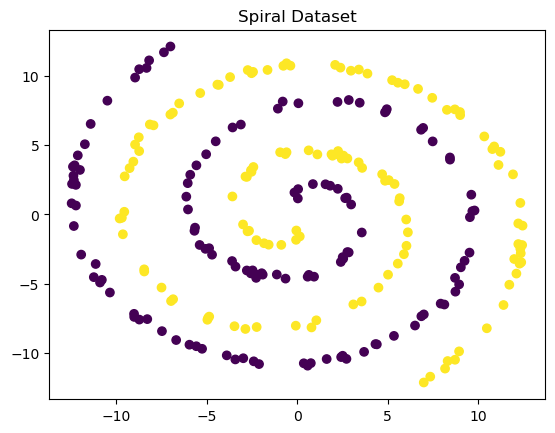

In [8]:
fig = plt.scatter(data["x"], data["y"], c=data["target"])
plt.title("Spiral Dataset")
plt.savefig(outp_fig_fname)
plt.show()

# Save Main Data File

In [9]:
data.to_csv(outp_fname, index=False, float_format="%.4f")